For some analysis, it's useful to limit MAF to some subset of the sky. This shows an example of using the featureScheduler footprint generator to do such a cut

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import healpy as hp

import lsst.sims.maf.db as db
import lsst.sims.maf.utils as utils
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.stackers as stackers
import lsst.sims.maf.metricBundles as metricBundles
from lsst.sims.maf.plots import HealpixSkyMap


In [2]:
# Database available from https://lsst-web.ncsa.illinois.edu/sim-data/sims_featureScheduler_runs_1.3/baseline/baseline_v1.3_10yrs.db
dbFile = 'baseline_v1.3_10yrs.db'
# This connection checks which version it thinks the database is and should do the right thing schema-wise
conn = db.OpsimDatabase(dbFile)
outDir='temp'
resultsDb = db.ResultsDb(outDir=outDir)

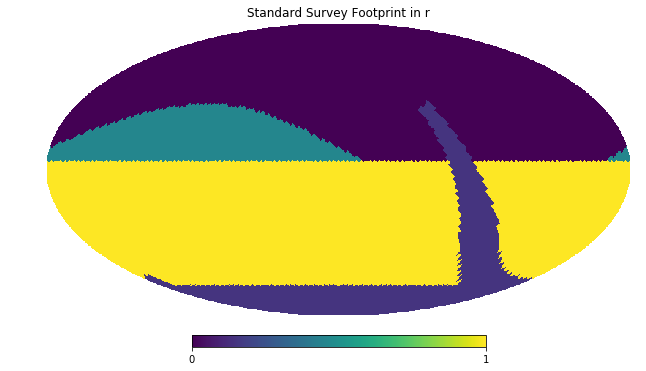

In [3]:
from lsst.sims.featureScheduler.utils import standard_goals
# Let's use the featureScheduler to pull up the usual footprints
nside = 32
footprints = standard_goals(nside=nside)
hp.mollview(footprints['r'], title='Standard Survey Footprint in r')

In [4]:
# Which healpixels are in WFD
hpid_wfd = np.where(footprints['r'] == 1)[0]
from lsst.sims.utils import hpid2RaDec
ra, dec = hpid2RaDec(nside, hpid_wfd)

In [5]:
bundleList = []
# Let's do i band and remove the deep drilling fields
sql = 'filter="i"'
sql += ' and note not like "DD%"'

metric = metrics.Coaddm5Metric()
# Use the UserPointSlicer to only run on the selected pixels ranther than the usual full sky
slicer = slicers.UserPointsSlicer(ra=ra, dec=dec)
plotDict = {'colorMax': 26.8}
bundleList.append(metricBundles.MetricBundle(metric,slicer,sql, plotDict=plotDict))

Querying database SummaryAllProps with constraint filter="i" and note not like "DD%" for columns ['fieldDec', 'fiveSigmaDepth', 'fieldRA']
Found 429183 visits
Running:  ['opsim_CoaddM5_i_and_note_not_like_DD%_USER']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "filter="i" and note not like "DD%"" constraint now.
Plotting complete.


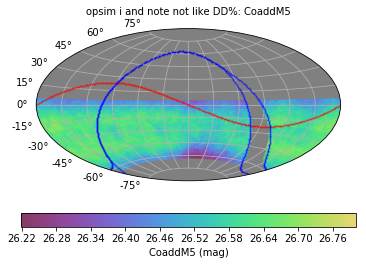

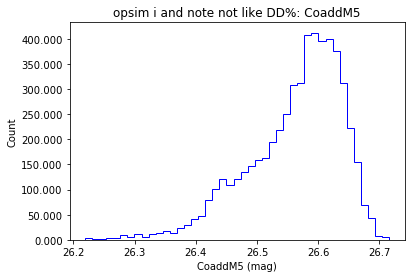

In [6]:

bd = metricBundles.makeBundlesDictFromList(bundleList)
bg = metricBundles.MetricBundleGroup(bd, conn, outDir=outDir, resultsDb=resultsDb)
bg.runAll()

bg.plotAll(closefigs=False)

Querying database SummaryAllProps with constraint filter="i" and note not like "DD%" for columns ['fieldDec', 'fiveSigmaDepth', 'fieldRA']
Found 429183 visits
Running:  ['opsim_CoaddM5_i_and_note_not_like_DD%_USER']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "filter="i" and note not like "DD%"" constraint now.


/Users/yoachim/lsstp3/stack/miniconda3-4.3.21-10a4fa6/DarwinX86/healpy/1.10.3.lsst1+6/lib/python/healpy-1.10.3-py3.6-macosx-10.7-x86_64.egg/healpy/pixelfunc.py:304: RuntimeWarning: invalid value encountered in less_equal
  return np.absolute(m - badval) <= atol + rtol * np.absolute(badval)
/Users/yoachim/lsstp3/python/miniconda3-4.3.21/lib/python3.6/site-packages/numpy/ma/core.py:2344: RuntimeWarning: invalid value encountered in less_equal
  mabs(xnew - value), atol + rtol * mabs(value))
/Users/yoachim/lsstp3/stack/miniconda3-4.3.21-10a4fa6/DarwinX86/healpy/1.10.3.lsst1+6/lib/python/healpy-1.10.3-py3.6-macosx-10.7-x86_64.egg/healpy/projaxes.py:1049: RuntimeWarning: invalid value encountered in less
  result.data[result.data<0]=0.0
/Users/yoachim/lsstp3/stack/miniconda3-4.3.21-10a4fa6/DarwinX86/healpy/1.10.3.lsst1+6/lib/python/healpy-1.10.3-py3.6-macosx-10.7-x86_64.egg/healpy/projaxes.py:1050: RuntimeWarning: invalid value encountered in greater
  result.data[result.data>1]=1.0
/Users/

Plotting complete.


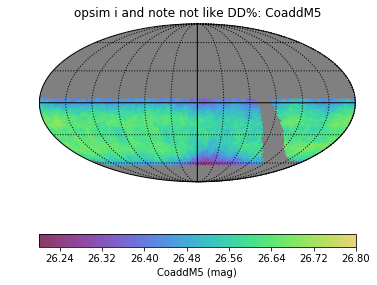

In [7]:
# By default, the UserPointSlicer plots individual points. We can switch back to the usual healpix plotters with
bundleList = []
# Let's do i band and remove the deep drilling fields
sql = 'filter="i"'
sql += ' and note not like "DD%"'

metric = metrics.Coaddm5Metric()
slicer = slicers.UserPointsSlicer(ra=ra, dec=dec, badval=np.nan)
# Use the regular plotting tool
plotFuncs = [HealpixSkyMap()]
plotDict = {'nside': nside, 'colorMin':26.2, 'colorMax': 26.8}
bundleList.append(metricBundles.MetricBundle(metric,slicer,sql, plotDict=plotDict, plotFuncs=plotFuncs))


bd = metricBundles.makeBundlesDictFromList(bundleList)
bg = metricBundles.MetricBundleGroup(bd, conn, outDir=outDir, resultsDb=resultsDb)
bg.runAll()

bg.plotAll(closefigs=False)